In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def draw(tag="rtx3070_squeezenet-conv2d_bs1_cudnn_d1s1", N=3, idx=-1):
    if idx != -1:
        name = f"{tag}_{idx}.csv" 
        df = pd.read_csv("results/" + name)
        idxs = df.iloc[:, 0].tolist()
        perfs = df.iloc[:, 3].tolist()
    else:  
        raw_perfs = []
        for i in range(N):
            name = f"{tag}_{i}.csv" 
            df = pd.read_csv("results/" + name)

            raw_perfs.append(df.iloc[:, 3].tolist())

        perfs, idxs = [], []
        num = len(raw_perfs[0])
        for j in range(num):
            lst = []
            for i in range(N):
                lst.append(raw_perfs[i][j])

            idxs.append(j+1)
            perfs.append(np.median(lst))
            #perfs.append(np.mean(lst))
    
    plt.plot(idxs, perfs)
    plt.title(tag)
    plt.show()
    
    
    
def draw_with_batch_dim(tags=[], idxs = [1,8,16,32], N=3, window = 10, ):
    data = []
    for tag in tags:
        lst = []
        for i in range(N):
            name = f"{tag}_{i}.csv" 
            df = pd.read_csv("results/" + name)
            lst.append(df.iloc[:, 3].tolist()[-window:])
        
        data_per_tag = []
        for i in range(window):
            tmp = []
            for j in range(N):
                tmp.append(lst[j][i])
            perf = np.median(tmp)
            data_per_tag.append(perf)
        data.append(data_per_tag)

    for i in range(window):
        perfs = []
        for j in range(len(tags)):
            perfs.append(data[j][-i])
        plt.plot(idxs, perfs, 'o-')
        plt.show()   
            

# Sweep over Input Channel Dimension 

### RTX 3070, cudnn

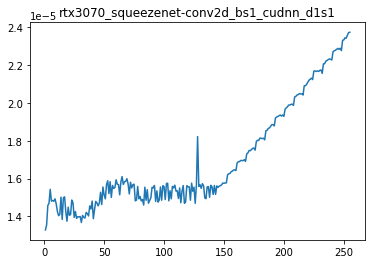

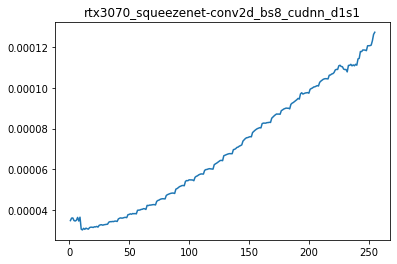

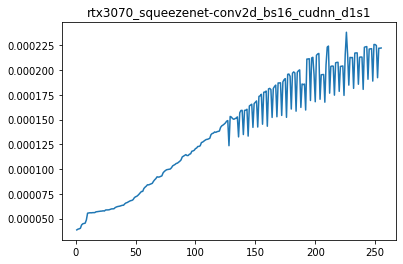

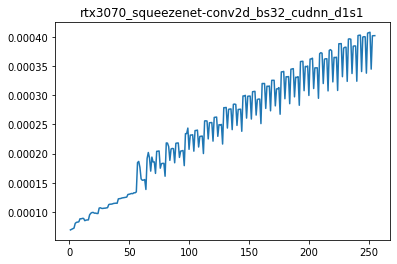

In [2]:
draw(tag="rtx3070_squeezenet-conv2d_bs1_cudnn_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs8_cudnn_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs16_cudnn_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs32_cudnn_d1s1", N=3)

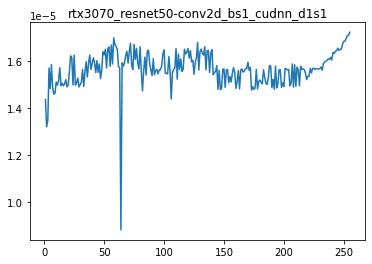

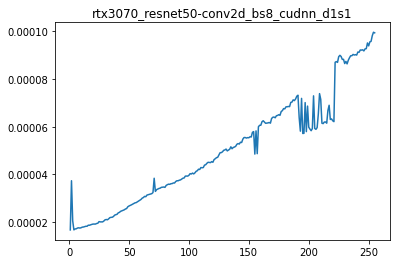

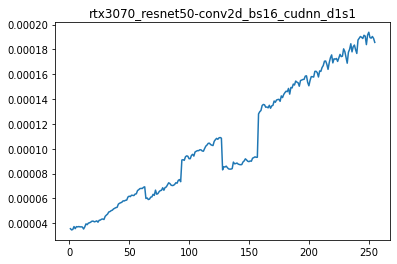

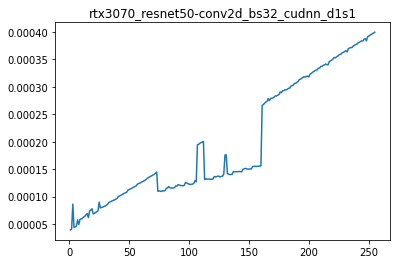

In [3]:
draw(tag="rtx3070_resnet50-conv2d_bs1_cudnn_d1s1", N=3)
draw(tag="rtx3070_resnet50-conv2d_bs8_cudnn_d1s1", N=3)
draw(tag="rtx3070_resnet50-conv2d_bs16_cudnn_d1s1", N=3)
draw(tag="rtx3070_resnet50-conv2d_bs32_cudnn_d1s1", N=3)

## Jetson, cudnn

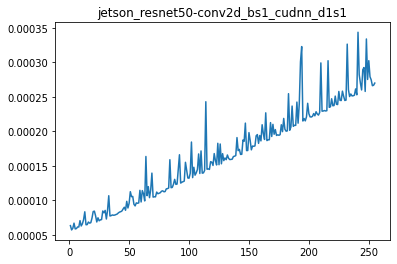

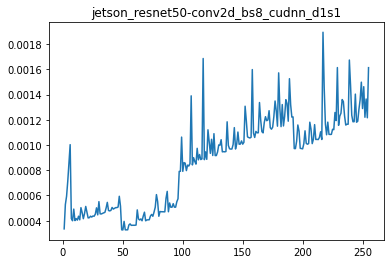

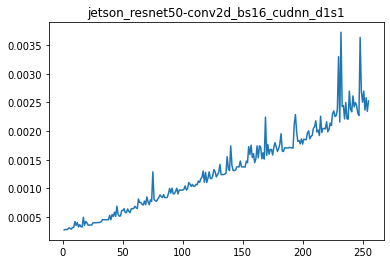

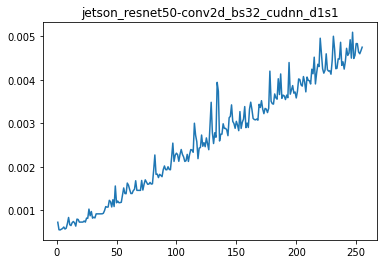

In [4]:
draw(tag="jetson_resnet50-conv2d_bs1_cudnn_d1s1", N=3)
draw(tag="jetson_resnet50-conv2d_bs8_cudnn_d1s1", N=3)
draw(tag="jetson_resnet50-conv2d_bs16_cudnn_d1s1", N=3)
draw(tag="jetson_resnet50-conv2d_bs32_cudnn_d1s1", N=3)

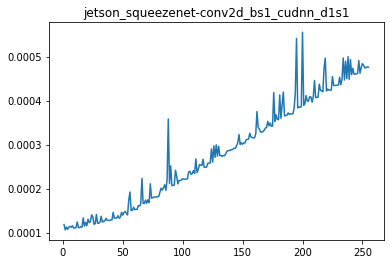

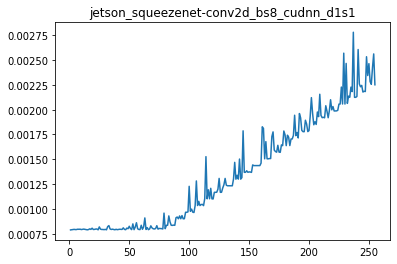

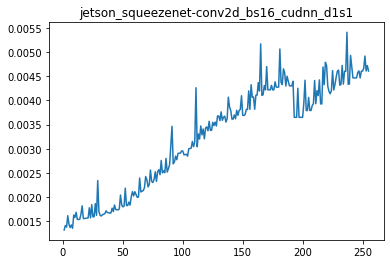

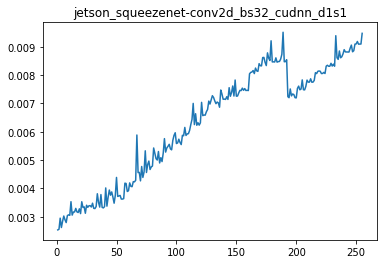

In [5]:
draw(tag="jetson_squeezenet-conv2d_bs1_cudnn_d1s1", N=3)
draw(tag="jetson_squeezenet-conv2d_bs8_cudnn_d1s1", N=3)
draw(tag="jetson_squeezenet-conv2d_bs16_cudnn_d1s1", N=3)
draw(tag="jetson_squeezenet-conv2d_bs32_cudnn_d1s1", N=3)

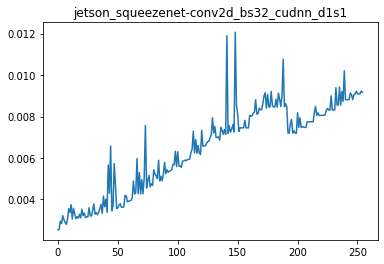

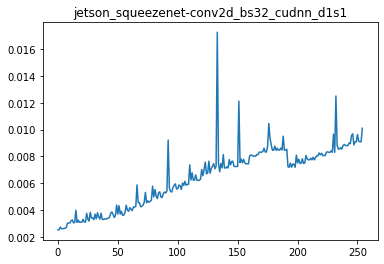

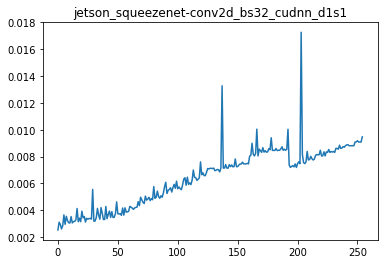

In [6]:
draw(tag="jetson_squeezenet-conv2d_bs32_cudnn_d1s1", N=1, idx=0)
draw(tag="jetson_squeezenet-conv2d_bs32_cudnn_d1s1", N=1, idx=1)
draw(tag="jetson_squeezenet-conv2d_bs32_cudnn_d1s1", N=1, idx=2)

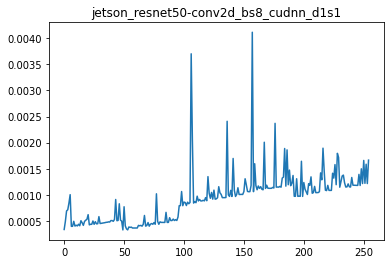

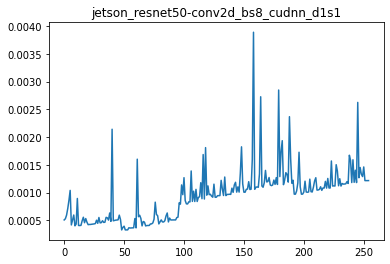

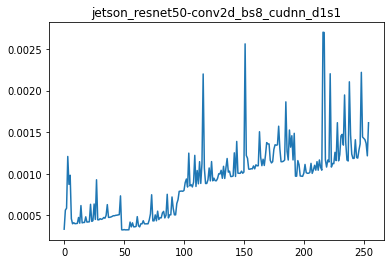

In [7]:
draw(tag="jetson_resnet50-conv2d_bs8_cudnn_d1s1", N=3, idx=0)
draw(tag="jetson_resnet50-conv2d_bs8_cudnn_d1s1", N=3, idx=1)
draw(tag="jetson_resnet50-conv2d_bs8_cudnn_d1s1", N=3, idx=2)

## AMD CPU, TVM op

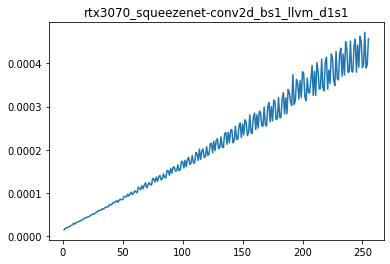

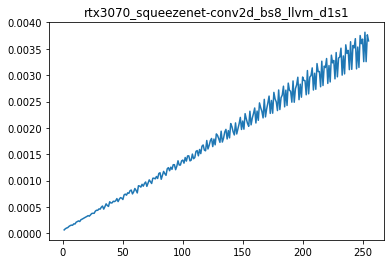

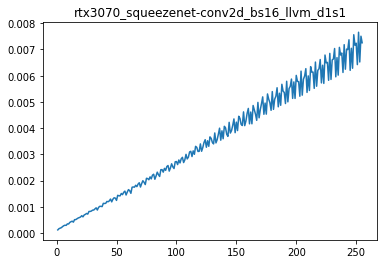

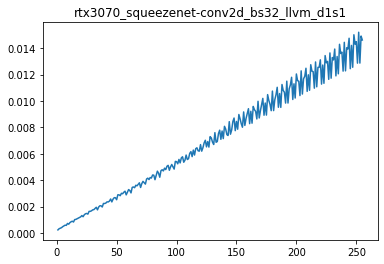

In [10]:
draw(tag="rtx3070_squeezenet-conv2d_bs1_llvm_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs8_llvm_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs16_llvm_d1s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs32_llvm_d1s1", N=3)

# Sweep over Batch Dimension

## RTX3070, cudnn

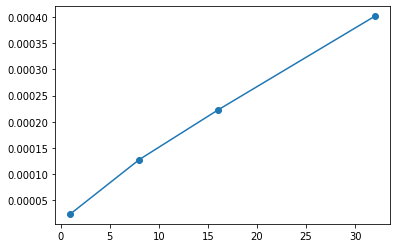

In [43]:
draw_with_batch_dim(tags=[
    "rtx3070_squeezenet-conv2d_bs1_cudnn_d1s1", 
    "rtx3070_squeezenet-conv2d_bs8_cudnn_d1s1",
    "rtx3070_squeezenet-conv2d_bs16_cudnn_d1s1",
    "rtx3070_squeezenet-conv2d_bs32_cudnn_d1s1"
], idxs = [1,8,16,32], N=3, window = 1)    

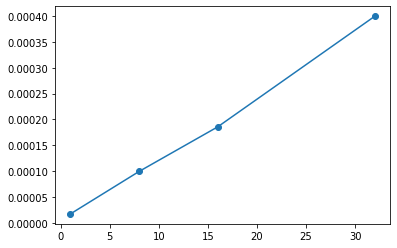

In [44]:
draw_with_batch_dim(tags=[
    "rtx3070_resnet50-conv2d_bs1_cudnn_d1s1", 
    "rtx3070_resnet50-conv2d_bs8_cudnn_d1s1",
    "rtx3070_resnet50-conv2d_bs16_cudnn_d1s1",
    "rtx3070_resnet50-conv2d_bs32_cudnn_d1s1"
], idxs = [1,8,16,32], N=3, window = 1)    

# Sweep over Output Channel Dimension (No change in N, Cin, H, W)

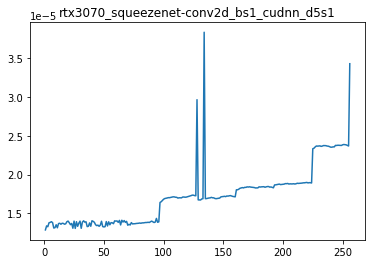

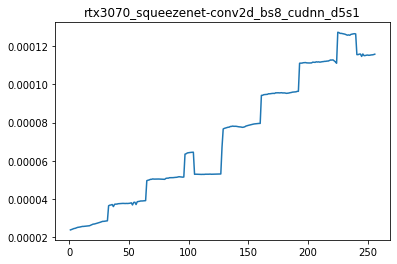

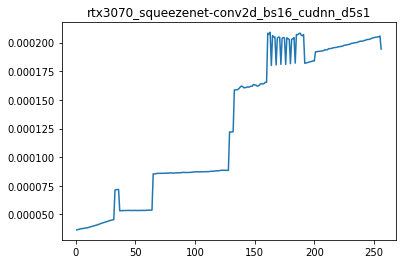

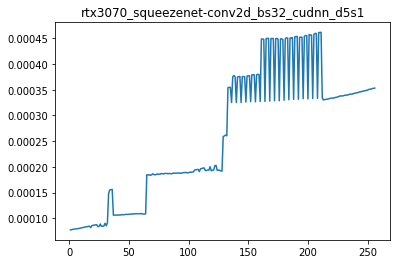

In [11]:
draw(tag="rtx3070_squeezenet-conv2d_bs1_cudnn_d5s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs8_cudnn_d5s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs16_cudnn_d5s1", N=3)
draw(tag="rtx3070_squeezenet-conv2d_bs32_cudnn_d5s1", N=3)